In [ ]:
import pandas as pd
from adtk.data import validate_series
import matplotlib.pyplot as plt
from adtk.visualization import plot
from adtk.detector import *

In [ ]:
ub0 = pd.read_csv("/content/sample_data/RPM/0un.csv")
ub0 = ub0.drop("Unnamed: 0",axis=1)
ub0["Time"] = pd.to_datetime(ub0["Time"],unit="ms",origin = pd.Timestamp('2023-12-1'))
ub0 = ub0.set_index("Time")
ub0.head()

,RPM,ACCx,ACCy,ACCz
Time,,,,
2023-12-01 00:00:54.035000064,85.0,0.27,-0.98,0.995643
2023-12-01 00:00:54.137999872,85.0,0.35,-1.10,1.004357
2023-12-01 00:00:54.240000000,85.0,0.24,-1.02,1.000000
2023-12-01 00:00:54.343000064,85.0,0.04,-0.47,0.973856
2023-12-01 00:00:54.444999936,85.0,0.31,-1.96,1.013072


In [ ]:
filter = ub0[ub0["RPM"]>1400]
print(filter)

                                  RPM  ACCx  ACCy      ACCz
Time                                                       
2023-12-01 00:13:35.484999936  1401.0  0.31 -8.36  1.089325
2023-12-01 00:13:35.574000128  1402.0  0.31 -8.36  1.089325
2023-12-01 00:13:35.676000000  1402.0  0.20  2.94  0.504357
2023-12-01 00:13:35.779000064  1402.0  1.57 -0.12  1.760349
2023-12-01 00:13:35.880999936  1402.0  0.16 -6.98  0.632898
...                               ...   ...   ...       ...
2023-12-01 00:14:19.339000064  1406.0 -0.90  2.82  0.188453
2023-12-01 00:14:19.339000064  1406.0 -0.90  2.82  0.188453
2023-12-01 00:14:19.339000064  1404.0 -0.90  2.82  0.188453
2023-12-01 00:14:19.339000064  1404.0 -0.90  2.82  0.188453
2023-12-01 00:14:19.339000064  1402.0 -0.90  2.82  0.188453

[1258 rows x 4 columns]


In [ ]:
ub0 = ub0.drop(filter.index)

In [ ]:
data = validate_series(ub0)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

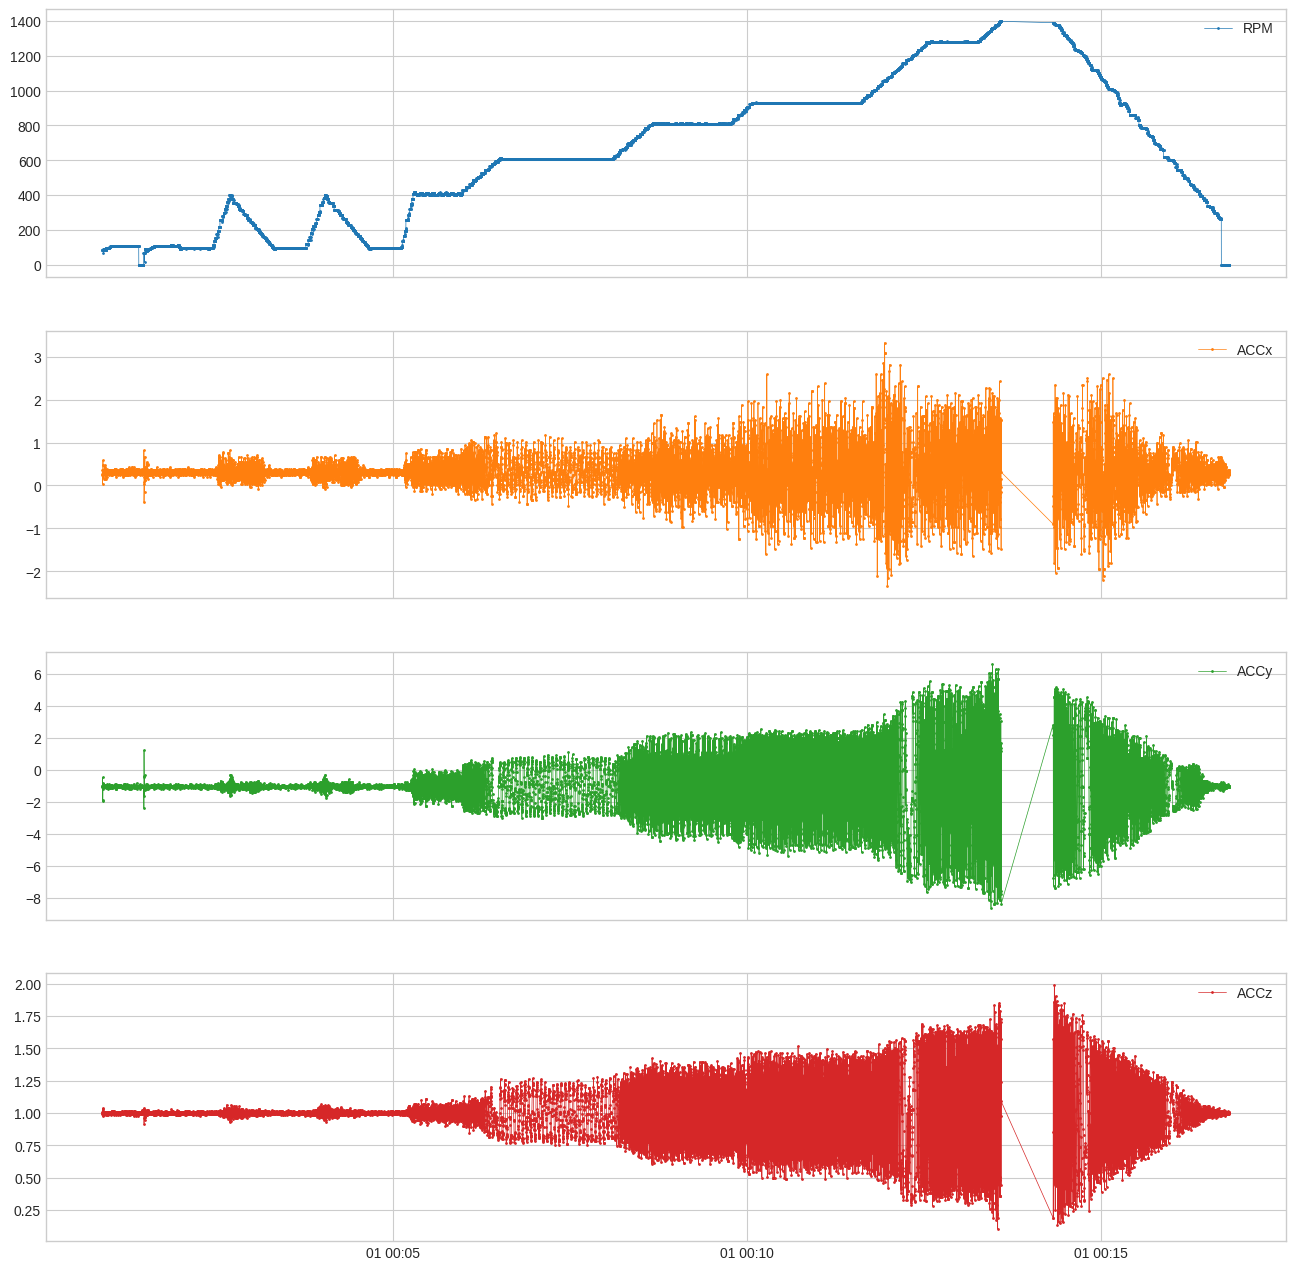

In [ ]:
plot(data)

In [ ]:
def analyse(path):
  ub = pd.read_csv(path)
  ub = ub.drop("Unnamed: 0",axis=1)
  ub["Time"] = pd.to_datetime(ub["Time"],unit="ms",origin = pd.Timestamp('2023-12-1'))
  ub = ub.set_index("Time")
  filter = ub[ub["RPM"]>1400]
  ub = ub.drop(filter.index)
  k = validate_series(ub)
  plot(k)

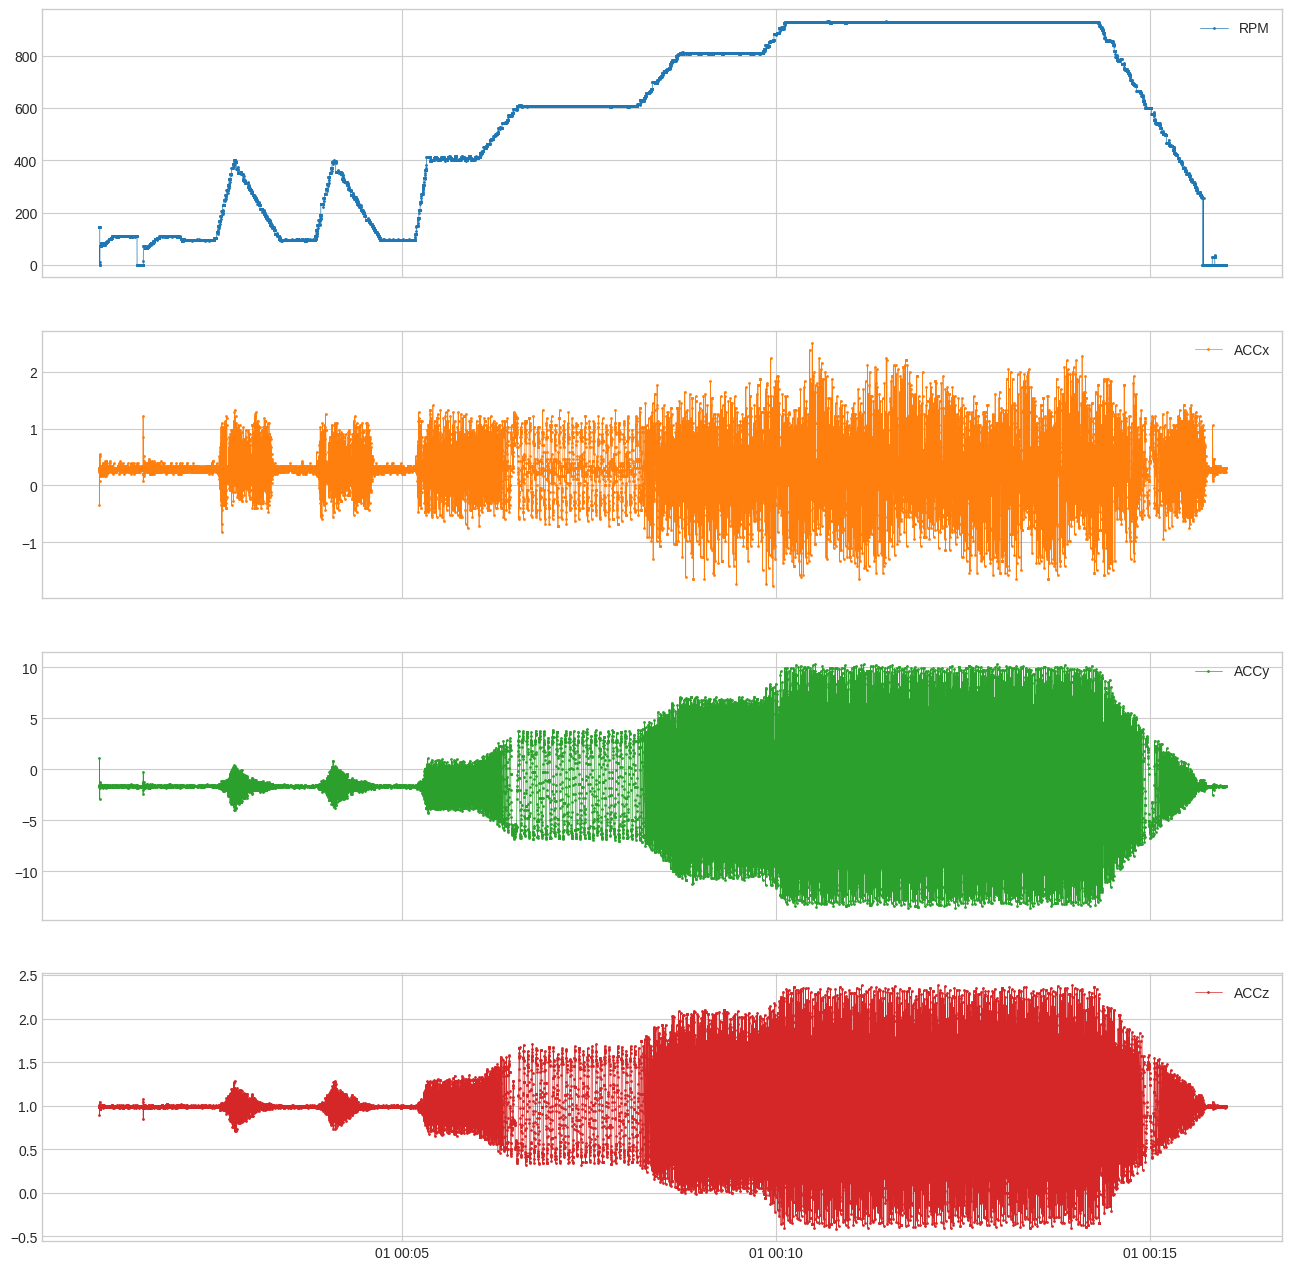

In [ ]:
analyse("/content/sample_data/RPM/100un.csv")

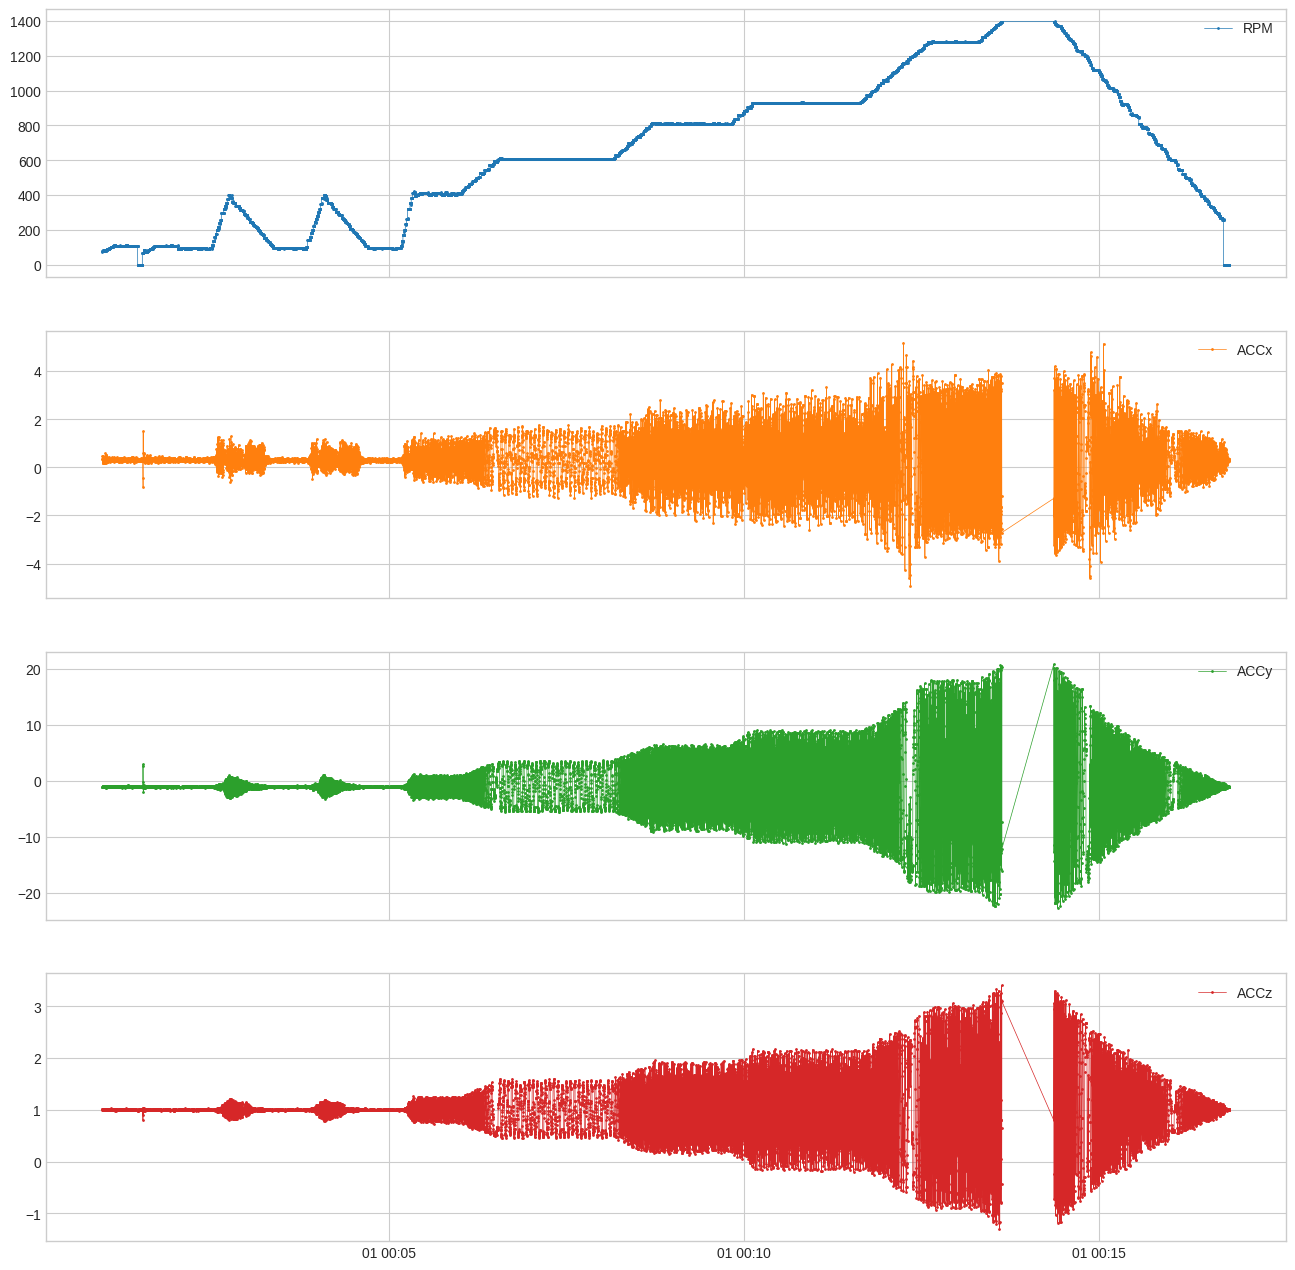

In [ ]:
analyse("/content/sample_data/RPM/200un.csv")

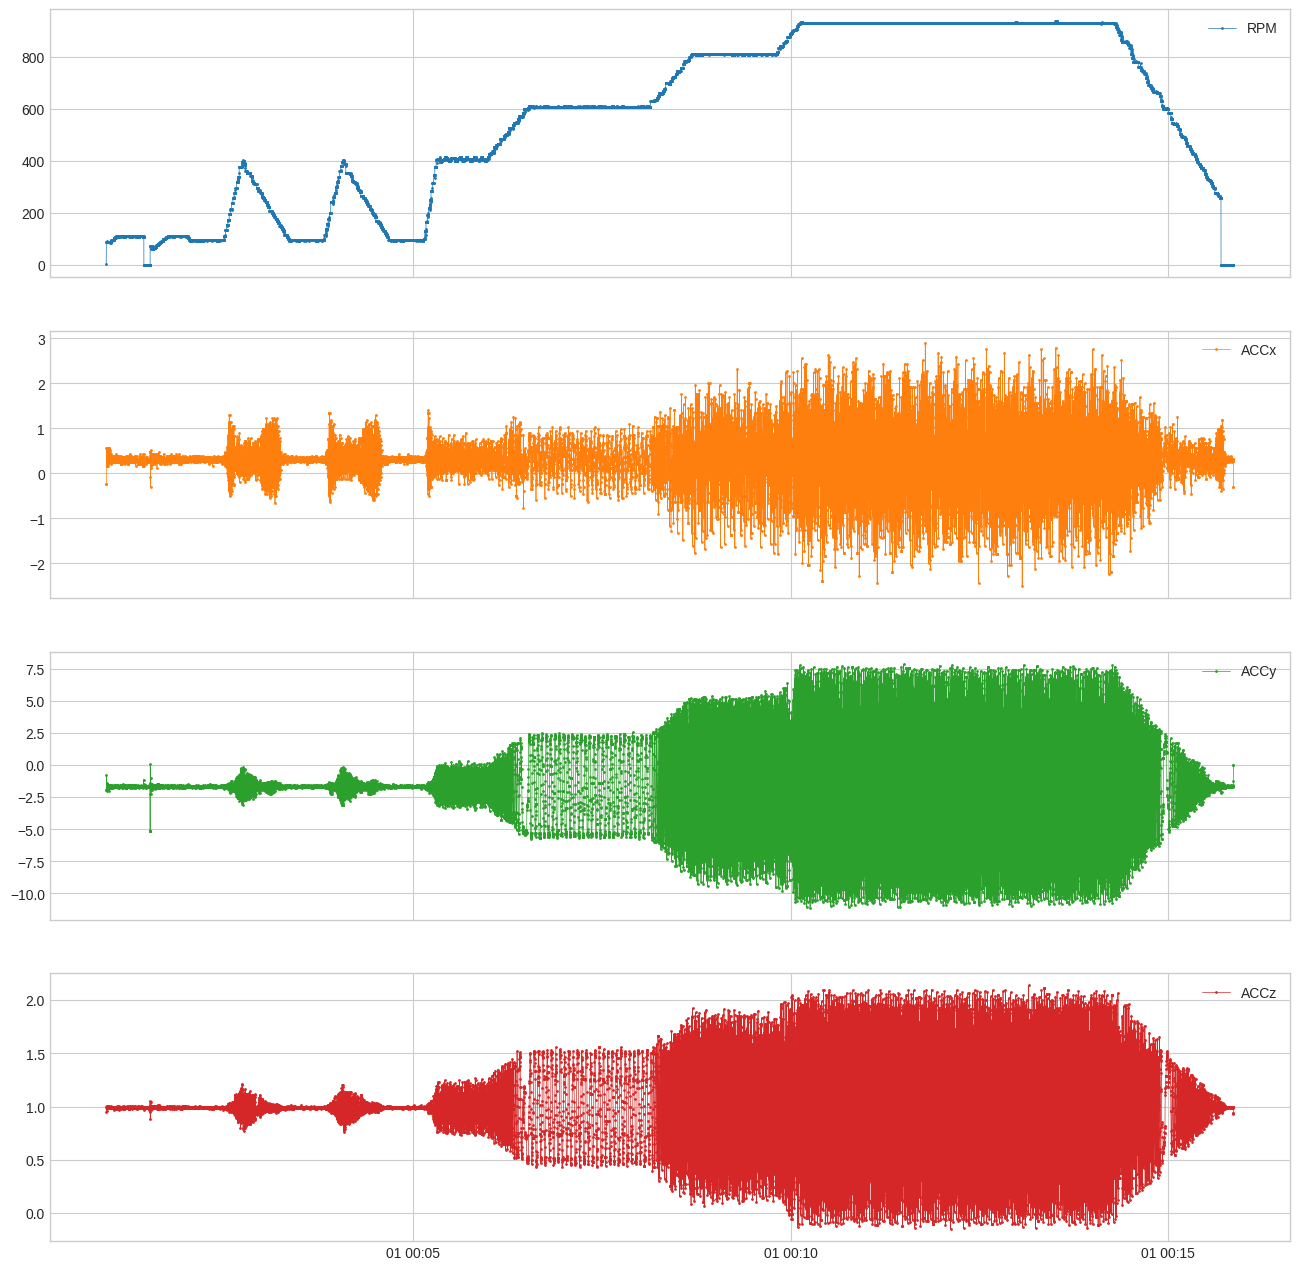

In [ ]:
analyse("/content/sample_data/RPM/2kg.csv")

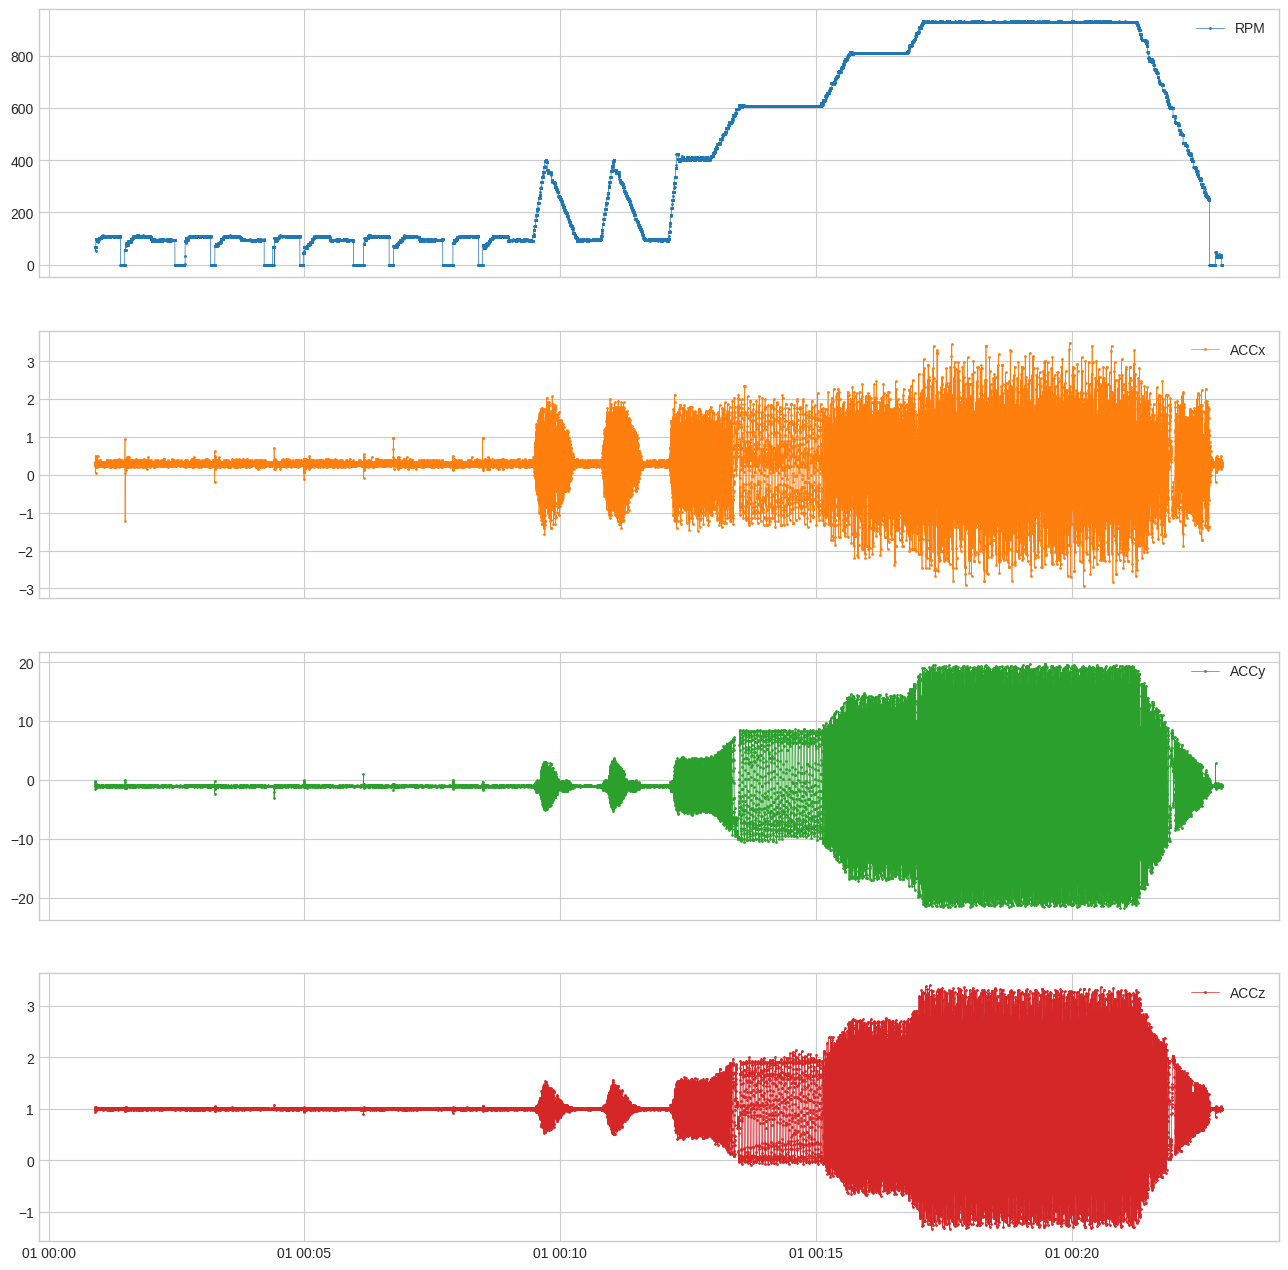

In [ ]:
analyse("/content/sample_data/RPM/400un.csv")

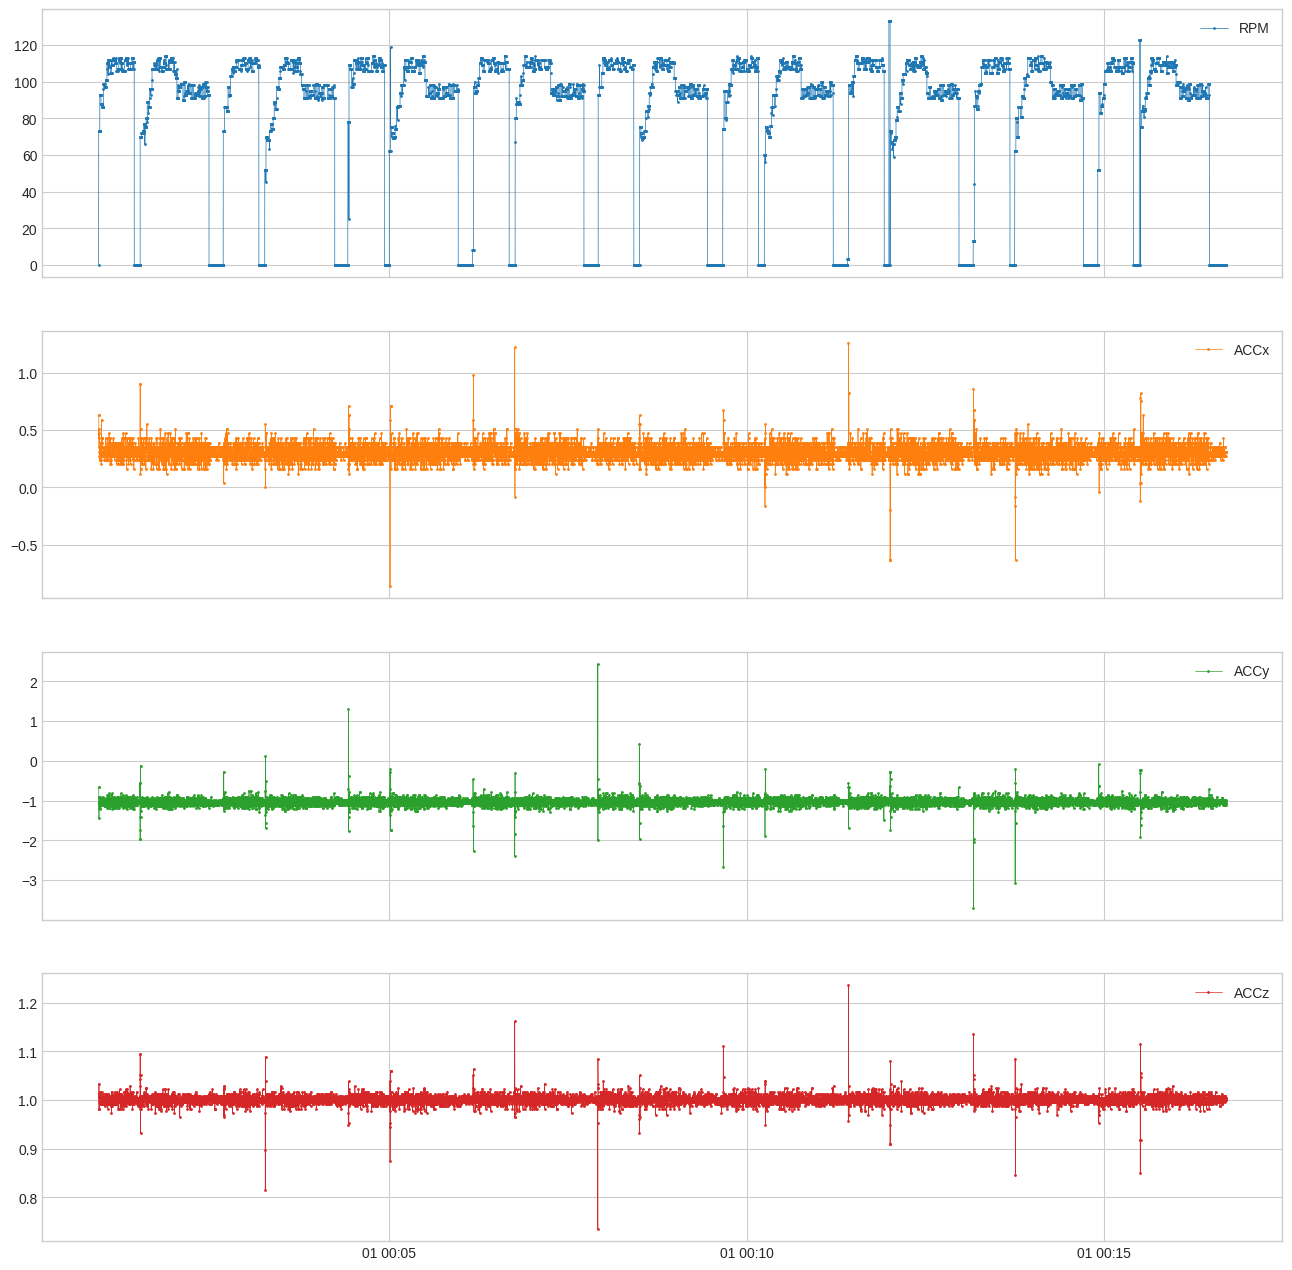

In [ ]:
analyse("/content/sample_data/RPM/650un.csv")

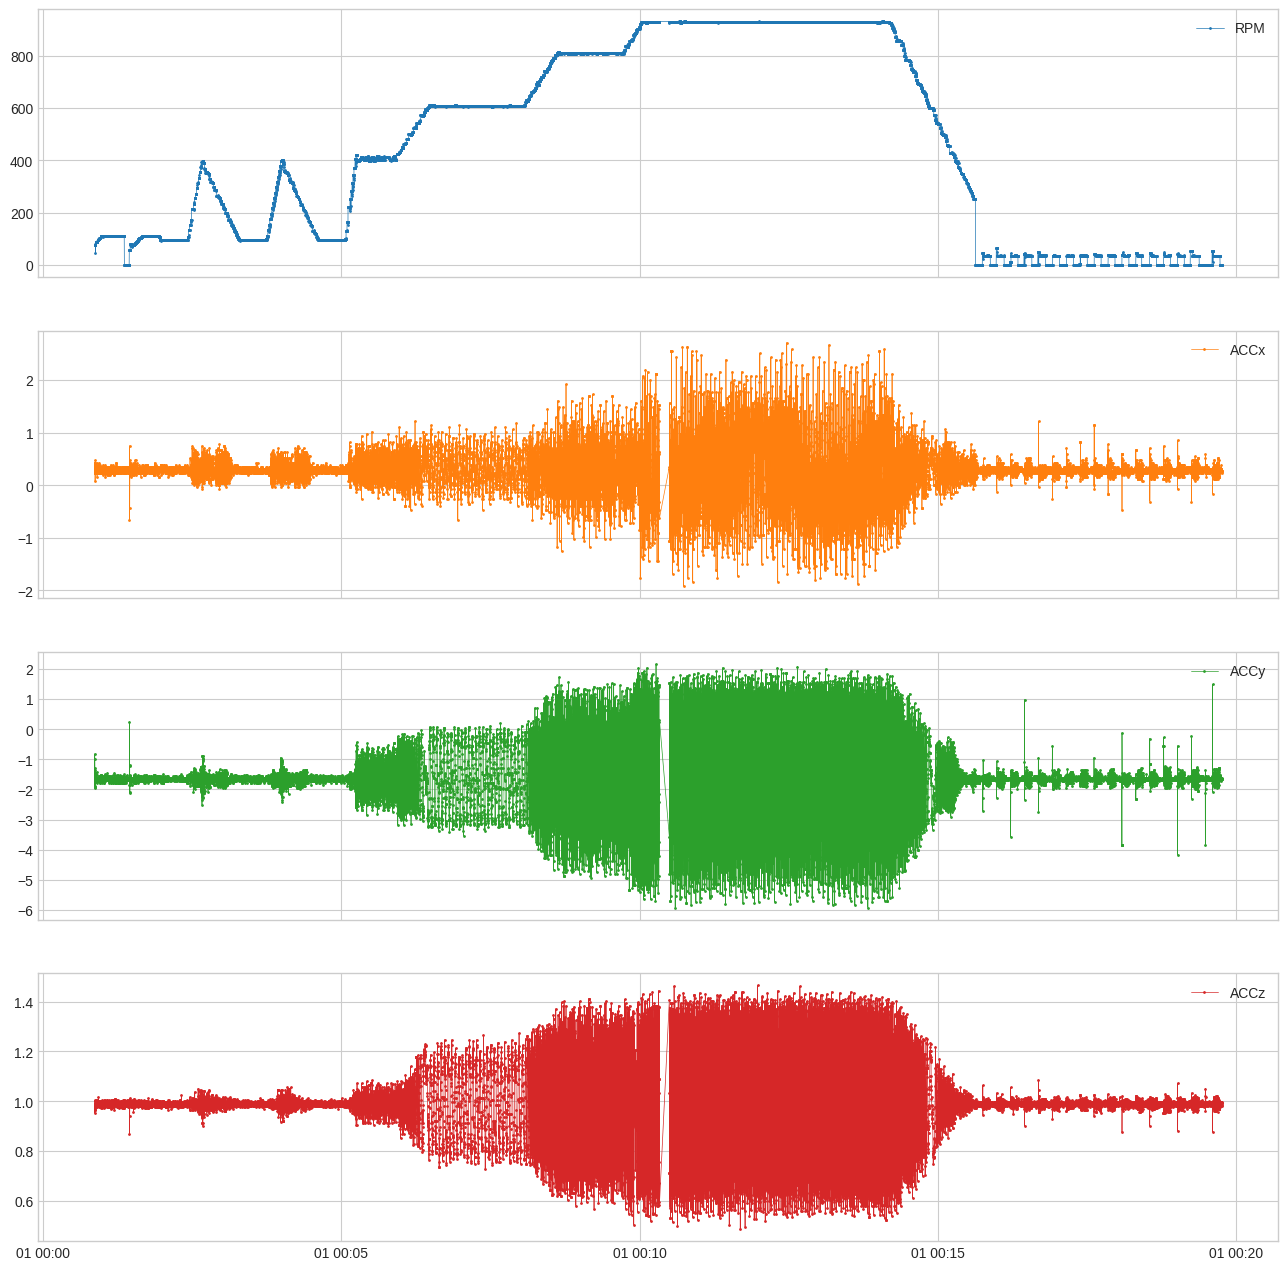

In [ ]:
analyse("/content/sample_data/RPM/empty.csv")

In [ ]:
ub0.head()

,RPM,ACCx,ACCy,ACCz
Time,,,,
2023-12-01 00:00:54.035000064,85.0,0.27,-0.98,0.995643
2023-12-01 00:00:54.137999872,85.0,0.35,-1.10,1.004357
2023-12-01 00:00:54.240000000,85.0,0.24,-1.02,1.000000
2023-12-01 00:00:54.343000064,85.0,0.04,-0.47,0.973856
2023-12-01 00:00:54.444999936,85.0,0.31,-1.96,1.013072


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:

X = ub0[['ACCx', 'ACCy', 'ACCz']]
y = ub0['RPM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 153849.65321150082


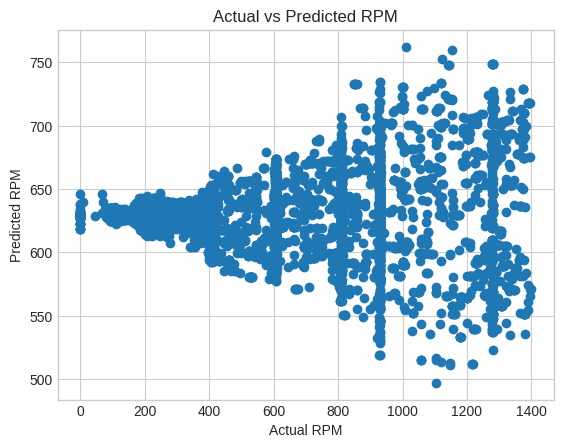

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual RPM')
plt.ylabel('Predicted RPM')
plt.title('Actual vs Predicted RPM')
plt.show()

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1999.1660641620565


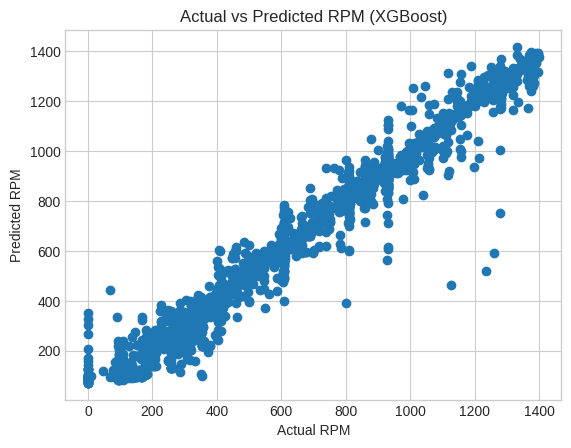

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual RPM')
plt.ylabel('Predicted RPM')
plt.title('Actual vs Predicted RPM (XGBoost)')
plt.show()

In [ ]:
threshold = 50
accuracy = sum(abs(y_test - y_pred) <= threshold) / len(y_test) * 100
print(accuracy)

87.6137023417844
